Import Library

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

Data Cleansing

In [35]:
data = pd.read_csv('jumlah_penduduk_miskin.csv')
data = data.drop(['id', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan', 'kode_provinsi'], axis=1)

In [36]:
label_encoder = LabelEncoder()
data['nama_kabupaten_kota_encoded'] = label_encoder.fit_transform(data['nama_kabupaten_kota'])

In [37]:
data.sort_values(by="nama_kabupaten_kota_encoded", inplace=True)

In [38]:
data.describe()

,jumlah_penduduk_miskin,tahun,nama_kabupaten_kota_encoded
count,594.000000,594.000000,594.000000
mean,167.057912,2012.500000,13.000000
std,123.702230,6.349636,7.795446
min,0.000000,2002.000000,0.000000
25%,66.575000,2007.000000,6.000000
50%,145.600000,2012.500000,13.000000
75%,240.550000,2018.000000,20.000000
max,619.000000,2023.000000,26.000000


In [39]:
data.reset_index(inplace=True)

In [40]:
data.drop("index", axis=1, inplace=True)

In [41]:
data.sort_values(by=["nama_kabupaten_kota_encoded", "tahun"], inplace=True)

In [42]:
data.replace(0.0 , np.nan, inplace=True)

In [43]:
data.ffill(inplace=True)
data.bfill(inplace=True)

In [44]:
data[data["jumlah_penduduk_miskin"] == np.nan]

,nama_kabupaten_kota,jumlah_penduduk_miskin,tahun,nama_kabupaten_kota_encoded


In [45]:
data.reset_index(inplace=True)
data.drop("index", axis=1, inplace=True)

In [46]:
new_data = data["jumlah_penduduk_miskin"]
final = new_data.to_numpy().flatten()
final

array([543.3, 515.5, 483.6, 550.1, 619. , 365.3, 267.1, 238.8, 296.3,
       292.2, 279.5, 271.7, 266.8, 281. , 272.7, 268. , 246.1, 223.2,
       263.6, 269.2, 258.6, 245.5, 245.5, 245.5, 245.5, 245.5, 245.5,
       261.7, 251.7, 232.7, 222.9, 219.8, 209.9, 206. , 197.9, 205.7,
       192.5, 190.9, 169. , 159. , 179.5, 190.8, 183.7, 179.4, 118.2,
       127.5, 121.7, 137.5, 154.7, 141.7, 130.4, 136.7, 161.8, 159.5,
       153.1, 157.7, 156.6, 169.2, 164.4, 164. , 157.2, 149.4, 186.3,
       202.7, 201.1, 204.1, 451.3, 476.4, 453.4, 476.7, 536.4, 519.5,
       491.4, 446. , 477.2, 470.5, 451. , 499.1, 479.1, 487.1, 490.8,
       487.3, 415. , 395. , 465.7, 491.2, 474.7, 453.8, 265.8, 228.1,
       221.9, 228.6, 244.1, 213.1, 190.5, 174.5, 158.5, 156.3, 147.8,
       133. , 130. , 104.9,  98.8,  96.8,  85.7,  79.4,  91.4,  96.6,
        94. ,  90.8, 368.6, 388.8, 357.9, 369.4, 415.7, 394.6, 334.3,
       311.1, 311. , 306.6, 292.2, 267.9, 256.6, 273.9, 261.4, 257.4,
       221.6, 207.1,

In [47]:
final = final.reshape((27, -1))
final

array([[543.3, 515.5, 483.6, 550.1, 619. , 365.3, 267.1, 238.8, 296.3,
        292.2, 279.5, 271.7, 266.8, 281. , 272.7, 268. , 246.1, 223.2,
        263.6, 269.2, 258.6, 245.5],
       [245.5, 245.5, 245.5, 245.5, 245.5, 261.7, 251.7, 232.7, 222.9,
        219.8, 209.9, 206. , 197.9, 205.7, 192.5, 190.9, 169. , 159. ,
        179.5, 190.8, 183.7, 179.4],
       [118.2, 127.5, 121.7, 137.5, 154.7, 141.7, 130.4, 136.7, 161.8,
        159.5, 153.1, 157.7, 156.6, 169.2, 164.4, 164. , 157.2, 149.4,
        186.3, 202.7, 201.1, 204.1],
       [451.3, 476.4, 453.4, 476.7, 536.4, 519.5, 491.4, 446. , 477.2,
        470.5, 451. , 499.1, 479.1, 487.1, 490.8, 487.3, 415. , 395. ,
        465.7, 491.2, 474.7, 453.8],
       [265.8, 228.1, 221.9, 228.6, 244.1, 213.1, 190.5, 174.5, 158.5,
        156.3, 147.8, 133. , 130. , 104.9,  98.8,  96.8,  85.7,  79.4,
         91.4,  96.6,  94. ,  90.8],
       [368.6, 388.8, 357.9, 369.4, 415.7, 394.6, 334.3, 311.1, 311. ,
        306.6, 292.2, 267.9, 256.6

In [48]:
df = pd.DataFrame(final)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,543.3,515.5,483.6,550.1,619.0,365.3,267.1,238.8,296.3,292.2,...,266.8,281.0,272.7,268.0,246.1,223.2,263.6,269.2,258.6,245.5
1,245.5,245.5,245.5,245.5,245.5,261.7,251.7,232.7,222.9,219.8,...,197.9,205.7,192.5,190.9,169.0,159.0,179.5,190.8,183.7,179.4
2,118.2,127.5,121.7,137.5,154.7,141.7,130.4,136.7,161.8,159.5,...,156.6,169.2,164.4,164.0,157.2,149.4,186.3,202.7,201.1,204.1
3,451.3,476.4,453.4,476.7,536.4,519.5,491.4,446.0,477.2,470.5,...,479.1,487.1,490.8,487.3,415.0,395.0,465.7,491.2,474.7,453.8
4,265.8,228.1,221.9,228.6,244.1,213.1,190.5,174.5,158.5,156.3,...,130.0,104.9,98.8,96.8,85.7,79.4,91.4,96.6,94.0,90.8
5,368.6,388.8,357.9,369.4,415.7,394.6,334.3,311.1,311.0,306.6,...,256.6,273.9,261.4,257.4,221.6,207.1,234.5,260.0,246.8,240.1
6,388.4,352.4,341.2,386.1,434.5,398.0,429.7,390.5,333.3,328.6,...,300.5,313.2,288.5,279.6,232.4,217.6,247.9,271.0,266.1,249.2
7,323.7,338.7,338.3,386.1,434.5,435.5,410.6,365.4,335.6,330.9,...,315.6,325.7,298.5,291.2,241.3,235.2,262.8,281.4,276.7,260.5
8,300.4,288.6,273.0,312.1,351.2,361.7,347.0,319.5,276.0,272.1,...,240.7,253.1,237.0,233.4,204.2,191.9,220.3,228.6,225.0,214.7
9,267.4,256.0,252.1,285.6,321.4,294.4,283.4,264.8,260.3,256.7,...,229.0,235.0,230.6,236.8,188.0,173.7,195.4,210.8,199.9,187.2


PRE-PROCESSING DATA

In [49]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(final)
df_scaled

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 6.95617844e-01, 5.28484339e-01, 5.19703292e-01,
        6.08695652e-01, 6.08819658e-01, 6.07641272e-01, 5.32387415e-01,
        5.44811321e-01, 5.64914503e-01, 5.43819285e-01, 5.37731872e-01,
        5.82550667e-01, 5.53650299e-01, 5.55335534e-01, 5.35370448e-01,
        5.32251082e-01, 5.28839629e-01],
       [4.29064417e-01, 4.58048976e-01, 4.89931448e-01, 4.28517824e-01,
        3.83663366e-01, 4.91117252e-01, 4.96110994e-01, 5.05563282e-01,
        4.49924292e-01, 4.49978061e-01, 4.48409975e-01, 3.97285626e-01,
        3.97084048e-01, 4.05953135e-01, 3.76071951e-01, 3.75210793e-01,
        3.91992091e-01, 3.86853728e-01, 3.70297030e-01, 3.71285057e-01,
        3.70129870e-01, 3.79325944e-01],
       [1.85007669e-01, 2.21196307e-01, 2.24721508e-01, 2.25891182e-01,
        2.33828383e-01, 2.54243979e-01, 2.41118352e-01, 2.83031989e-01,
        3.17759031e-01, 3.17683194e-01, 3.18462594e-01

Mencari Nilai Cluster menggunakan Elbow Method

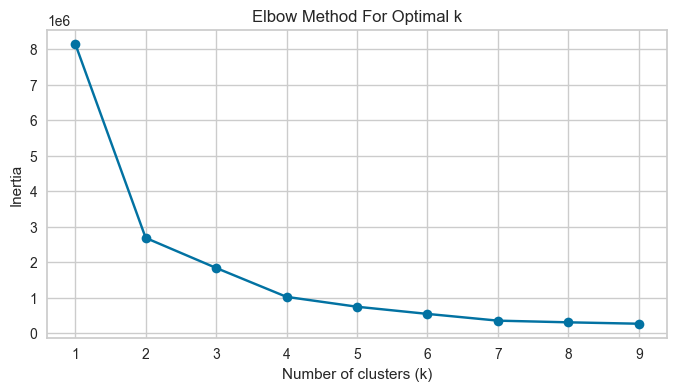

In [50]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
df = df_scaled.reshape((27, -1))
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.695618,0.528484,0.519703,0.608696,0.608820,...,0.544811,0.564915,0.543819,0.537732,0.582551,0.553650,0.555336,0.535370,0.532251,0.528840
1,0.429064,0.458049,0.489931,0.428518,0.383663,0.491117,0.496111,0.505563,0.449924,0.449978,...,0.397084,0.405953,0.376072,0.375211,0.391992,0.386854,0.370297,0.371285,0.370130,0.379326
2,0.185008,0.221196,0.224722,0.225891,0.233828,0.254244,0.241118,0.283032,0.317759,0.317683,...,0.308533,0.328900,0.317298,0.318508,0.362827,0.361912,0.385259,0.396191,0.407792,0.435196
3,0.823620,0.921517,0.935304,0.862289,0.863696,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.467983,0.423123,0.439374,0.396811,0.381353,0.395184,0.367458,0.370654,0.310621,0.310663,...,0.251501,0.193160,0.180088,0.176855,0.186110,0.180047,0.176458,0.174131,0.175974,0.178919
5,0.665069,0.745684,0.730720,0.660976,0.664521,0.753454,0.669750,0.687297,0.640493,0.640412,...,0.522942,0.549926,0.520184,0.515388,0.521997,0.511821,0.491309,0.516116,0.506710,0.516625
6,0.703029,0.672621,0.694944,0.692308,0.695545,0.760166,0.870296,0.871349,0.688730,0.688679,...,0.617067,0.632890,0.576867,0.562184,0.548690,0.539101,0.520792,0.539138,0.548485,0.537209
7,0.578988,0.645122,0.688732,0.692308,0.695545,0.834189,0.830145,0.813166,0.693705,0.693725,...,0.649443,0.659278,0.597783,0.586636,0.570687,0.584827,0.553575,0.560904,0.571429,0.562769
8,0.534317,0.544560,0.548843,0.553471,0.558086,0.688512,0.696447,0.706769,0.564785,0.564721,...,0.488851,0.506016,0.469149,0.464798,0.478992,0.472330,0.460066,0.450398,0.459524,0.459172
9,0.471051,0.479125,0.504070,0.503752,0.508911,0.555665,0.562750,0.579972,0.530824,0.530935,...,0.463765,0.467807,0.455762,0.471965,0.438952,0.425045,0.405281,0.413144,0.405195,0.396969


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from fcmeans import FCM
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances_argmin_min

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       27 non-null     float64
 1   1       27 non-null     float64
 2   2       27 non-null     float64
 3   3       27 non-null     float64
 4   4       27 non-null     float64
 5   5       27 non-null     float64
 6   6       27 non-null     float64
 7   7       27 non-null     float64
 8   8       27 non-null     float64
 9   9       27 non-null     float64
 10  10      27 non-null     float64
 11  11      27 non-null     float64
 12  12      27 non-null     float64
 13  13      27 non-null     float64
 14  14      27 non-null     float64
 15  15      27 non-null     float64
 16  16      27 non-null     float64
 17  17      27 non-null     float64
 18  18      27 non-null     float64
 19  19      27 non-null     float64
 20  20      27 non-null     float64
 21  21      27 non-null     float64
dtypes: f

In [54]:
df.columns = df.columns.astype(str)

Melakukan Clustering berdasarkan Alogritma Fuzzy C-Means

In [55]:
X = df.to_numpy()
my_model = FCM(n_clusters = 4)
my_model.fit(X)
centers = my_model.centers
cluster_labels_fcm = my_model.predict(X)
silhouette_avg = silhouette_score(X, cluster_labels_fcm)

print('Fuzzy C-Means', cluster_labels_fcm)
print('Silhouette FCM =', silhouette_avg)
print('Davies-Bouldin Index =', davies_bouldin_score(X, cluster_labels_fcm))

Fuzzy C-Means [1 0 2 1 2 1 1 1 0 0 2 2 2 2 0 0 2 0 2 3 2 3 3 3 3 3 2]
Silhouette FCM = 0.34928913195729433
Davies-Bouldin Index = 0.7401899092749601


Melakukan Clustering berdasarkan Alogritma K-Means

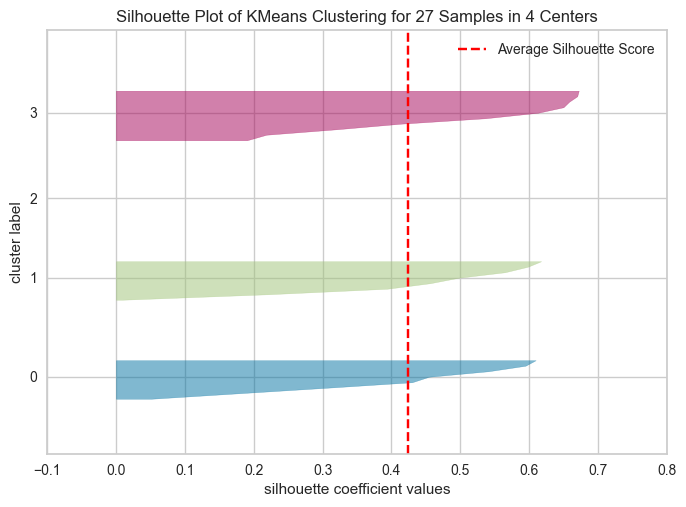

Silhoouette average of K-Means =  0.6815719288217392
Davies-Bouldin Index of K-Means =  0.3719399747631218


In [56]:
kmeans = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df)
visualizer.show()

cluster_labels = kmeans.fit_predict(df)
df["Clusters"]= cluster_labels
silhouette_avg = silhouette_score(df, cluster_labels)
print("Silhoouette average of K-Means = ", silhouette_avg)
print("Davies-Bouldin Index of K-Means = ", davies_bouldin_score(df, cluster_labels))

In [57]:
cities = data["nama_kabupaten_kota"].unique()
cities

array(['KABUPATEN BANDUNG', 'KABUPATEN BANDUNG BARAT', 'KABUPATEN BEKASI',
       'KABUPATEN BOGOR', 'KABUPATEN CIAMIS', 'KABUPATEN CIANJUR',
       'KABUPATEN CIREBON', 'KABUPATEN GARUT', 'KABUPATEN INDRAMAYU',
       'KABUPATEN KARAWANG', 'KABUPATEN KUNINGAN', 'KABUPATEN MAJALENGKA',
       'KABUPATEN PANGANDARAN', 'KABUPATEN PURWAKARTA',
       'KABUPATEN SUBANG', 'KABUPATEN SUKABUMI', 'KABUPATEN SUMEDANG',
       'KABUPATEN TASIKMALAYA', 'KOTA BANDUNG', 'KOTA BANJAR',
       'KOTA BEKASI', 'KOTA BOGOR', 'KOTA CIMAHI', 'KOTA CIREBON',
       'KOTA DEPOK', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA'], dtype=object)

In [58]:
df.index = cities
df = df.drop(['Clusters'],axis = 1)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
KABUPATEN BANDUNG,1.000000,1.000000,1.000000,1.000000,1.000000,0.695618,0.528484,0.519703,0.608696,0.608820,...,0.544811,0.564915,0.543819,0.537732,0.582551,0.553650,0.555336,0.535370,0.532251,0.528840
KABUPATEN BANDUNG BARAT,0.429064,0.458049,0.489931,0.428518,0.383663,0.491117,0.496111,0.505563,0.449924,0.449978,...,0.397084,0.405953,0.376072,0.375211,0.391992,0.386854,0.370297,0.371285,0.370130,0.379326
KABUPATEN BEKASI,0.185008,0.221196,0.224722,0.225891,0.233828,0.254244,0.241118,0.283032,0.317759,0.317683,...,0.308533,0.328900,0.317298,0.318508,0.362827,0.361912,0.385259,0.396191,0.407792,0.435196
KABUPATEN BOGOR,0.823620,0.921517,0.935304,0.862289,0.863696,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
KABUPATEN CIAMIS,0.467983,0.423123,0.439374,0.396811,0.381353,0.395184,0.367458,0.370654,0.310621,0.310663,...,0.251501,0.193160,0.180088,0.176855,0.186110,0.180047,0.176458,0.174131,0.175974,0.178919
KABUPATEN CIANJUR,0.665069,0.745684,0.730720,0.660976,0.664521,0.753454,0.669750,0.687297,0.640493,0.640412,...,0.522942,0.549926,0.520184,0.515388,0.521997,0.511821,0.491309,0.516116,0.506710,0.516625
KABUPATEN CIREBON,0.703029,0.672621,0.694944,0.692308,0.695545,0.760166,0.870296,0.871349,0.688730,0.688679,...,0.617067,0.632890,0.576867,0.562184,0.548690,0.539101,0.520792,0.539138,0.548485,0.537209
KABUPATEN GARUT,0.578988,0.645122,0.688732,0.692308,0.695545,0.834189,0.830145,0.813166,0.693705,0.693725,...,0.649443,0.659278,0.597783,0.586636,0.570687,0.584827,0.553575,0.560904,0.571429,0.562769
KABUPATEN INDRAMAYU,0.534317,0.544560,0.548843,0.553471,0.558086,0.688512,0.696447,0.706769,0.564785,0.564721,...,0.488851,0.506016,0.469149,0.464798,0.478992,0.472330,0.460066,0.450398,0.459524,0.459172
KABUPATEN KARAWANG,0.471051,0.479125,0.504070,0.503752,0.508911,0.555665,0.562750,0.579972,0.530824,0.530935,...,0.463765,0.467807,0.455762,0.471965,0.438952,0.425045,0.405281,0.413144,0.405195,0.396969


Mencari Centroid untuk K-Means CLustering

In [59]:
centroids = kmeans.cluster_centers_
    
# Hitung jarak antara setiap kota dengan centroid
closest, _ = pairwise_distances_argmin_min(centroids, df)

# Kota yang menjadi centroid dari setiap cluster
centroid_kota = [cities[i] for i in closest]


print("Centroid kota untuk setiap cluster:")
for i, k in enumerate(centroid_kota):
    print(f"Cluster {i}: {k}")

Centroid kota untuk setiap cluster:
Cluster 0: KABUPATEN KUNINGAN
Cluster 1: KABUPATEN CIANJUR
Cluster 2: KABUPATEN BOGOR
Cluster 3: KOTA DEPOK


In [60]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[0.31317101 0.32032818 0.33057519 0.31439962 0.3122731  0.35528523
  0.36044251 0.37389893 0.33668613 0.33668824 0.33419126 0.29539379
  0.29859027 0.30356766 0.28281217 0.28056492 0.29587865 0.29176409
  0.2880088  0.2895563  0.29150433 0.29586067]
 [0.65219996 0.66268567 0.6678449  0.65987336 0.65763201 0.69112712
  0.65511352 0.65832174 0.58336037 0.5833699  0.57941547 0.50819967
  0.51348092 0.5279449  0.491895   0.48737879 0.49094785 0.48100156
  0.46520902 0.47321055 0.47399892 0.47195205]
 [0.82361963 0.92151746 0.9353042  0.86228893 0.86369637 1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.09231212 0.08807708 0.08995287 0.08371482 0.08582508 0.09883537
  0.13115409 0.13977747 0.1272334  0.12762176 0.12850606 0.11425046
  0.11541595 0.09478573 0.09213554 0.090957   0.09478497 0.09415433
  0.09342134 0.09219339 0.09454545 0.0939154 ]]


PCA Plot of K-Means Clustering

c:\Users\nicho\miniconda3\envs\py310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


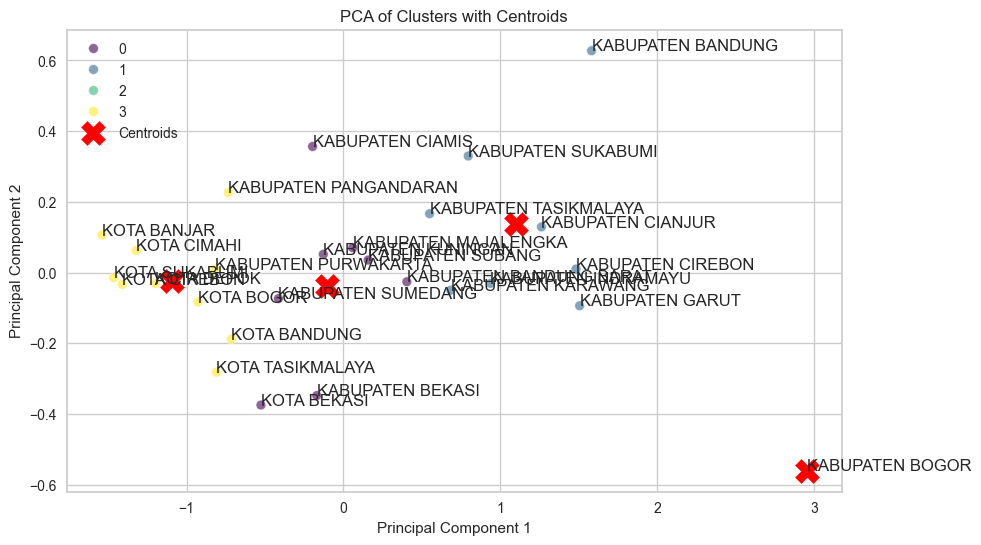

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)
reduced_centers = pca.transform(cluster_centers)

# Membuat DataFrame untuk visualisasi
pca_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
pca_df['City'] = df.index

# Scatter plot dari hasil PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50, alpha=0.6)
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], s=300, c='red', label='Centroids', marker='X')
for i in range(len(pca_df)):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['City'][i])
plt.title('PCA of Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc="upper left")
plt.show()

In [62]:
city_coords = {
    'Kabupaten Bandung': [-6.90389, 107.61861],
    'Kabupaten Bandung Barat': [-6.9214, 107.5164],
    'Kabupaten Bekasi': [-6.2383, 107.1347],
    'Kabupaten Bogor': [-6.595, 106.7892],
    'Kabupaten Ciamis': [-7.3264, 108.3537],
    'Kabupaten Cianjur': [-6.8193, 107.1397],
    'Kabupaten Cirebon': [-6.7063, 108.5617],
    'Kabupaten Garut': [-7.2167, 107.9066],
    'Kabupaten Indramayu': [-6.3253, 108.3237],
    'Kabupaten Karawang': [-6.305, 107.3496],
    'Kabupaten Kuningan': [-6.9789, 108.4855],
    'Kabupaten Majalengka': [-6.8394, 108.2254],
    'Kabupaten Pangandaran': [-7.6907, 108.6543],
    'Kabupaten Purwakarta': [-6.5589, 107.4429],
    'Kabupaten Subang': [-6.5765, 107.7618],
    'Kabupaten Sukabumi': [-6.9238, 106.928],
    'Kabupaten Sumedang': [-6.8374, 107.9168],
    'Kabupaten Tasikmalaya': [-7.3949, 108.2087],
    'Kota Bandung': [-6.9175, 107.6191],
    'Kota Banjar': [-7.3706, 108.5346],
    'Kota Bekasi': [-6.2409, 106.9921],
    'Kota Bogor': [-6.5944, 106.7896],
    'Kota Cimahi': [-6.8723, 107.5427],
    'Kota Cirebon': [-6.7263, 108.5522],
    'Kota Depok': [-6.4025, 106.7942],
    'Kota Sukabumi': [-6.9285, 106.9287],
    'Kota Tasikmalaya': [-7.3274, 108.2206]
}


In [63]:
df["Clusters"] = cluster_labels

pengelompokan CLuster

In [64]:
df["Clusters"]

KABUPATEN BANDUNG          1
KABUPATEN BANDUNG BARAT    0
KABUPATEN BEKASI           0
KABUPATEN BOGOR            2
KABUPATEN CIAMIS           0
KABUPATEN CIANJUR          1
KABUPATEN CIREBON          1
KABUPATEN GARUT            1
KABUPATEN INDRAMAYU        1
KABUPATEN KARAWANG         1
KABUPATEN KUNINGAN         0
KABUPATEN MAJALENGKA       0
KABUPATEN PANGANDARAN      3
KABUPATEN PURWAKARTA       3
KABUPATEN SUBANG           0
KABUPATEN SUKABUMI         1
KABUPATEN SUMEDANG         0
KABUPATEN TASIKMALAYA      1
KOTA BANDUNG               3
KOTA BANJAR                3
KOTA BEKASI                0
KOTA BOGOR                 3
KOTA CIMAHI                3
KOTA CIREBON               3
KOTA DEPOK                 3
KOTA SUKABUMI              3
KOTA TASIKMALAYA           3
Name: Clusters, dtype: int32

Display Penyebaran dalam bentuk peta jawa barat

In [65]:
import pandas as pd

# Membuat DataFrame dengan koordinat
coords_df = pd.DataFrame(city_coords).T
coords_df.columns = ['Latitude', 'Longitude']

# Menambahkan label cluster ke DataFrame
coords_df['Cluster'] = cluster_labels

print(coords_df)

                         Latitude  Longitude  Cluster
Kabupaten Bandung        -6.90389  107.61861        1
Kabupaten Bandung Barat  -6.92140  107.51640        0
Kabupaten Bekasi         -6.23830  107.13470        0
Kabupaten Bogor          -6.59500  106.78920        2
Kabupaten Ciamis         -7.32640  108.35370        0
Kabupaten Cianjur        -6.81930  107.13970        1
Kabupaten Cirebon        -6.70630  108.56170        1
Kabupaten Garut          -7.21670  107.90660        1
Kabupaten Indramayu      -6.32530  108.32370        1
Kabupaten Karawang       -6.30500  107.34960        1
Kabupaten Kuningan       -6.97890  108.48550        0
Kabupaten Majalengka     -6.83940  108.22540        0
Kabupaten Pangandaran    -7.69070  108.65430        3
Kabupaten Purwakarta     -6.55890  107.44290        3
Kabupaten Subang         -6.57650  107.76180        0
Kabupaten Sukabumi       -6.92380  106.92800        1
Kabupaten Sumedang       -6.83740  107.91680        0
Kabupaten Tasikmalaya    -7.

In [66]:
import folium
import matplotlib.pyplot as plt

# Membuat peta dasar
m = folium.Map(location=[-1.0, 114.0], zoom_start=5)

# Menambahkan titik-titik kota ke peta
colors = {0: 'red', 1: 'blue', 2: 'green', 3:'yellow'}
for city, row in coords_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,
        popup=f"{city}: Cluster {row['Cluster']}",
        color=colors[row['Cluster']],
        fill=True,
        fill_color=colors[row['Cluster']]
    ).add_to(m)

# Menampilkan peta
m.save('penduduk.html')
